In [1]:
suppressPackageStartupMessages(library(ArchR))
suppressPackageStartupMessages(library(ArchRNA))
suppressPackageStartupMessages(library(parallel))  
suppressPackageStartupMessages(library(Seurat))
suppressMessages(suppressWarnings(suppressPackageStartupMessages(library(SeuratData))))

Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”
Warning message:
“package ‘Matrix’ was built under R version 4.1.3”
Warning message:
“package ‘magrittr’ was built under R version 4.1.3”


In [2]:
suppressMessages(suppressWarnings(addArchRGenome("hg19")))

In [3]:
suppressWarnings(SeuratData::InstallData("ifnb"))
suppressWarnings(SeuratData::LoadData("ifnb"))

An object of class Seurat 
14053 features across 13999 samples within 1 assay 
Active assay: RNA (14053 features, 0 variable features)

In [4]:
mat <- Seurat::GetAssayData(ifnb, slot="counts")
colnames(mat) <- paste0(ifnb$stim, "#", colnames(mat))
rownames(ifnb@meta.data) <- colnames(mat)

In [5]:
proj <- ArchRNA::Matrix2ArchRProject(mat=mat, name=c("CTRL", "STIM"), meta.data = ifnb@meta.data,outputDirectory = "ifnb", addPrefixHashsymbol = F)

In [6]:
proj <- suppressWarnings(addDoubletScores_(proj, verbose=F))

ArchR logging to : ArchRLogs/ArchR-addDoubletScores-9c2f529d679e8-Date-2023-02-26_Time-21-42-50.log
If there is an issue, please report to github with logFile!

2023-02-26 21:42:50 : Batch Execution w/ safelapply!, 0 mins elapsed.

STIM (1 of 2) : UMAP Projection R^2 = 0.99763

STIM (1 of 2) : UMAP Projection R^2 = 0.99763

Biased Clusters : 
Cluster9 


CTRL (2 of 2) : UMAP Projection R^2 = 0.99615

CTRL (2 of 2) : UMAP Projection R^2 = 0.99615

ArchR logging successful to : ArchRLogs/ArchR-addDoubletScores-9c2f529d679e8-Date-2023-02-26_Time-21-42-50.log



In [7]:
xfun::embed_file("ifnb/CTRL/CTRL-Doublet-Summary.pdf")
xfun::embed_file("ifnb/STIM//STIM-Doublet-Summary.pdf")

Shiny tags cannot be represented in plain text (need html)

Shiny tags cannot be represented in plain text (need html)

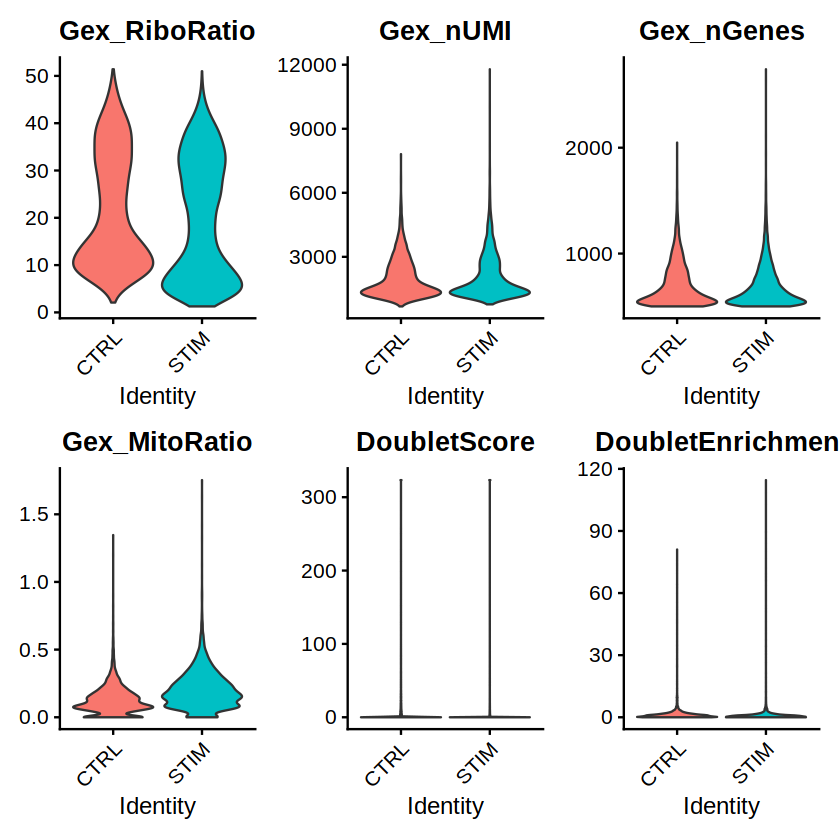

In [8]:
VlnPlotS(proj, features=c('Gex_RiboRatio', 'Gex_nUMI', 'Gex_nGenes', 'Gex_MitoRatio', "DoubletScore", "DoubletEnrichment"), group.by="Sample", pt.size=0)

In [9]:
# cellcycling
proj <- suppressMessages(Cellcycling(proj))

Warning message in PartialSeurat(project, useMatrix = "GeneExpressionMatrix", assay = "counts", :
“features is NULL, use all features!”


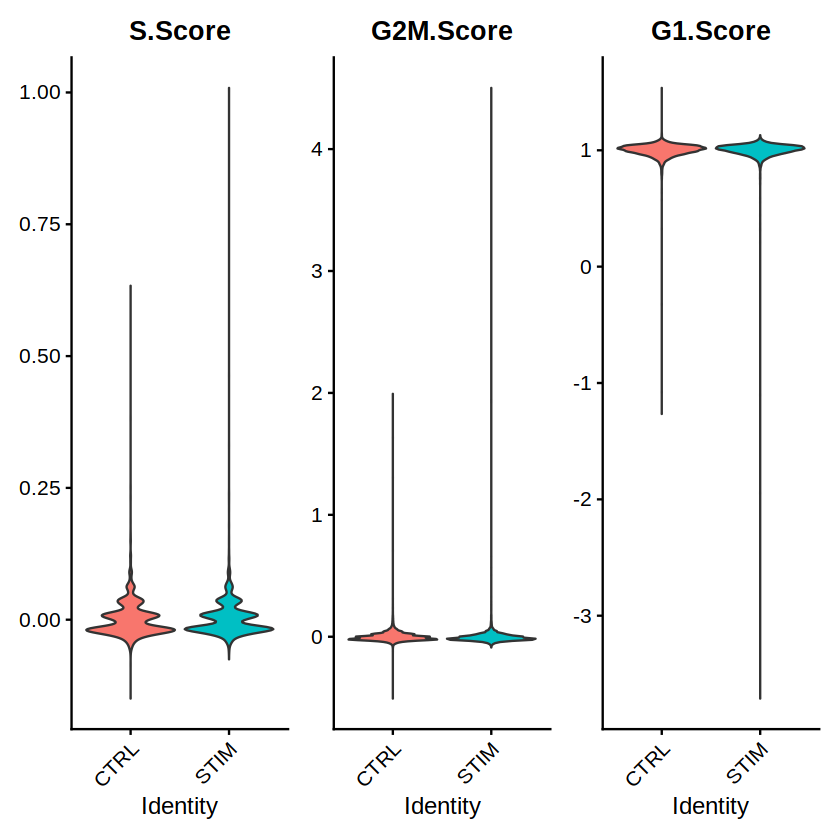

In [10]:
VlnPlotS(proj, features=c('S.Score', 'G2M.Score', 'G1.Score'), group.by="Sample", pt.size=0)

In [16]:
proj <- suppressMessages(addPCA(proj))

In [17]:
proj <- suppressMessages(addDiffusionMap(proj))

Warning message:
“as(<dsCMatrix>, "dsTMatrix") is deprecated since Matrix 1.5-0; do as(., "TsparseMatrix") instead”


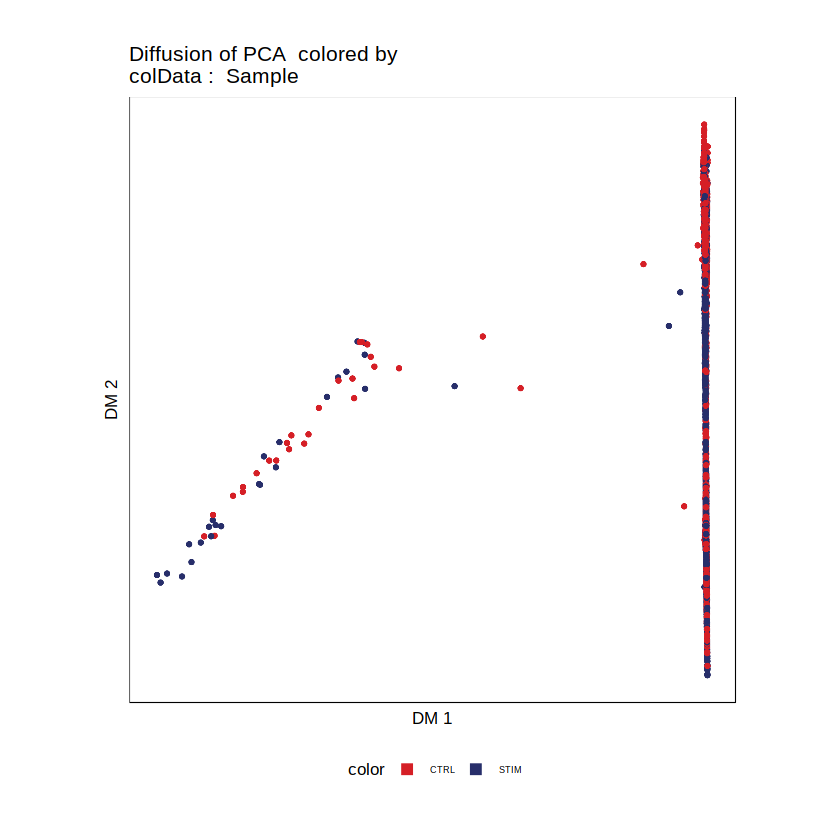

In [20]:
p1 <- suppressMessages(plotEmbedding(proj,  embedding = "Diffusion", size = 1.5, labelAsFactors=F, labelMeans=F))
p1

In [21]:
proj <- suppressMessages(addRNAIterativeLSI(proj))

Warning message in if (grepl("log", units, ignore.case = TRUE)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (units %in% "BinarizedCounts") {:
“the condition has length > 1 and only the first element will be used”


In [22]:
proj <- addHarmony(proj, reducedDims = "PCA", groupBy = "Sample")

Warning message:
“package ‘Rcpp’ was built under R version 4.1.3”
Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony 9/10

Harmony 10/10



In [23]:
proj <- addUMAP(proj, reducedDims = "PCA", verbose = F, force = T) 

21:49:22 Creating temp model dir /tmp/RtmphYLo1v/dir9c2f519f90839

21:49:22 Creating dir /tmp/RtmphYLo1v/dir9c2f519f90839

21:49:24 Changing to /tmp/RtmphYLo1v/dir9c2f519f90839

21:49:24 Creating /data/sz753404/git_code/ArchRNA/vignettes/ifnb/Embeddings/Save-Uwot-UMAP-Params-PCA-9c2f5354d6dea-Date-2023-02-26_Time-21-49-22.tar



In [24]:
proj <- suppressMessages(addBatchClusters(proj, resolutions=seq(0.4, 0.8, by=0.1), cluster_prefix='Cluster_', reducedDims = "Harmony", biasCol = "Gex_nUMI"))

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13999
Number of edges: 460718

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8790
Number of communities: 12
Elapsed time: 1 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13999
Number of edges: 460718

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8645
Number of communities: 13
Elapsed time: 1 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13999
Number of edges: 460718

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8503
Number of communities: 13
Elapsed time: 1 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13999
Number of edges: 460718

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8361
Number of communities: 15
Elapsed time: 1 seconds
Modularity O

In [37]:
proj@cellColData

DataFrame with 13999 rows and 17 columns
                      Sample    Gex_RiboRatio Gex_nUMI Gex_nGenes
                       <Rle>          <array>  <array>    <array>
CTRL#AAACATACATTTCC.1   CTRL 15.1806430228704     3017        877
CTRL#AAACATACCAGAAA.1   CTRL 4.79645304312777     2481        713
CTRL#AAACATACCTCGCT.1   CTRL               10     3420        850
CTRL#AAACATACCTGGTA.1   CTRL 18.3776932826362     3156       1109
CTRL#AAACATACGATGAA.1   CTRL 32.6017130620985     1868        634
...                      ...              ...      ...        ...
STIM#TTTGCATGAACGAA.1   STIM 7.13645329029944     5577       1237
STIM#TTTGCATGACGTAC.1   STIM 31.0850439882698     1364        536
STIM#TTTGCATGCCTGTC.1   STIM 29.4701986754967     2114        817
STIM#TTTGCATGCTAAGC.1   STIM  42.904073587385     1522        523
STIM#TTTGCATGGGACGA.1   STIM 32.8958880139983     1143        503
                           Gex_MitoRatio DoubletScore DoubletEnrichment
                             

In [41]:
#options(repr.plot.width = 12, repr.plot.height = 6)
#suppressMessages(clustreeS(proj, prefix = "Cluster_"))

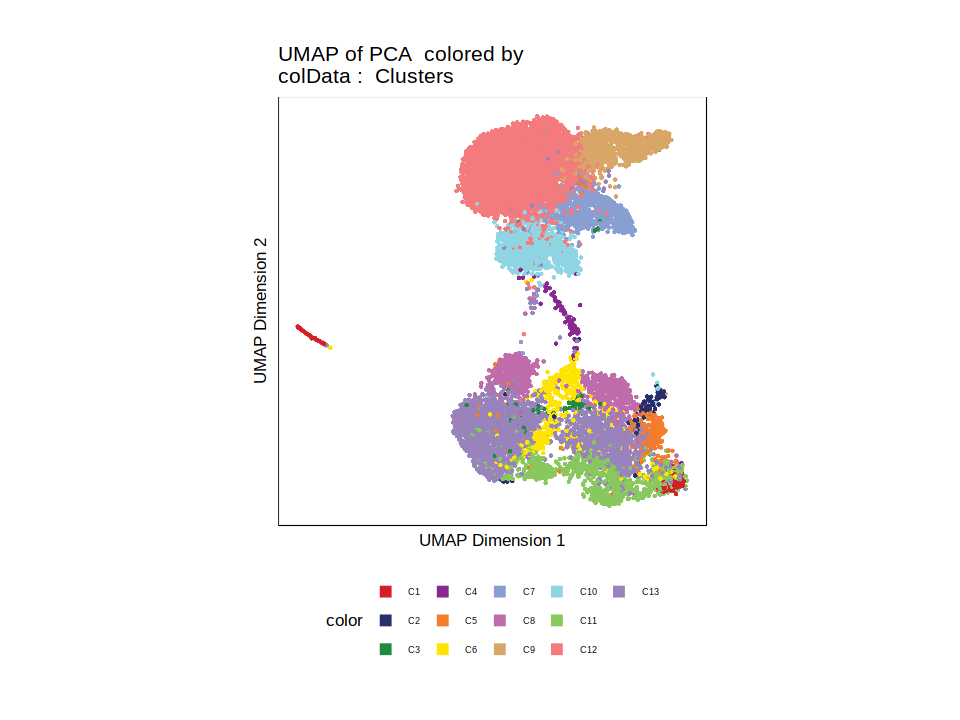

In [42]:
options(repr.plot.width = 8, repr.plot.height = 6)
##ArchR styple plots
proj$Clusters <- proj$Cluster_0.5
p1 <- suppressMessages(plotEmbedding(proj, name = "Clusters", embedding = "UMAP", size = 1.5, labelAsFactors=F, labelMeans=F))
p1

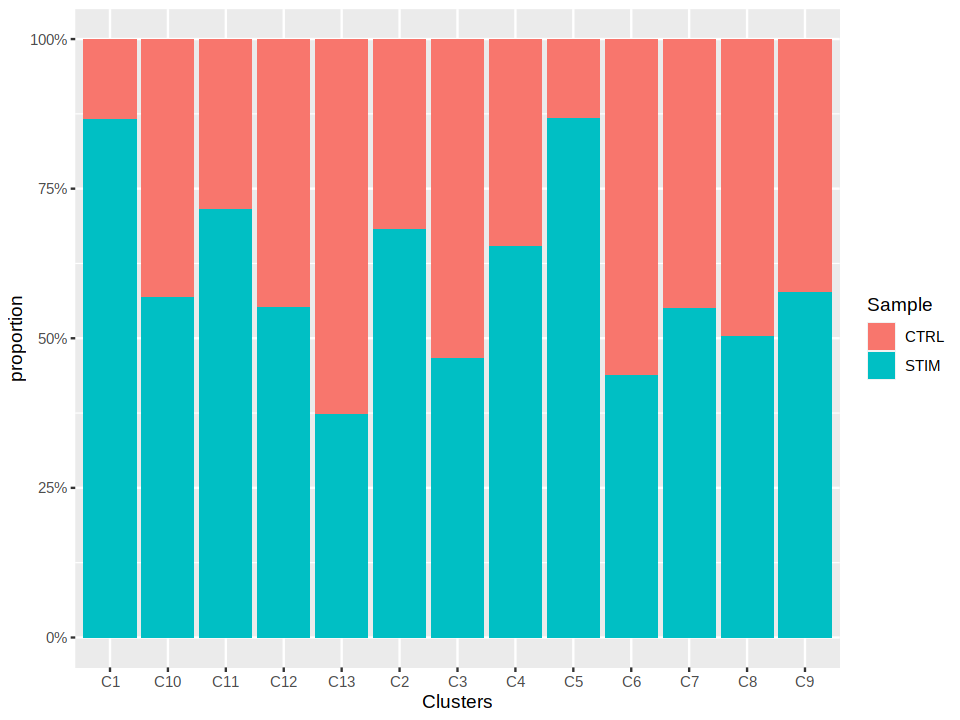

In [43]:
suppressMessages(PropBarPlotS(proj, Cluster="Clusters"))

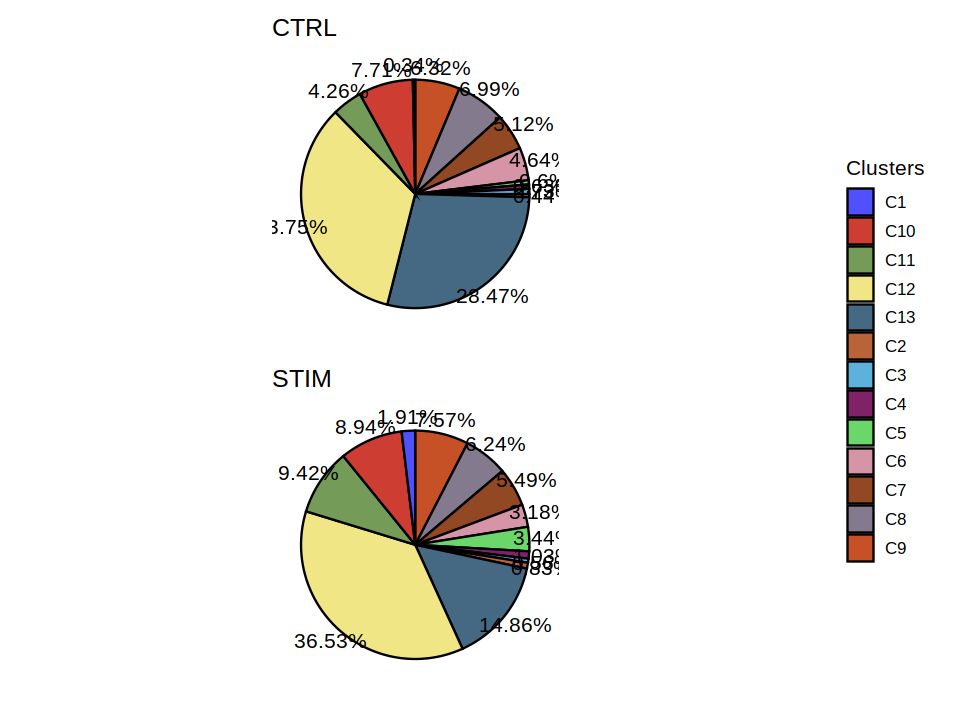

In [44]:
PiePlotS(proj, Cluster="Clusters", condition="Sample")

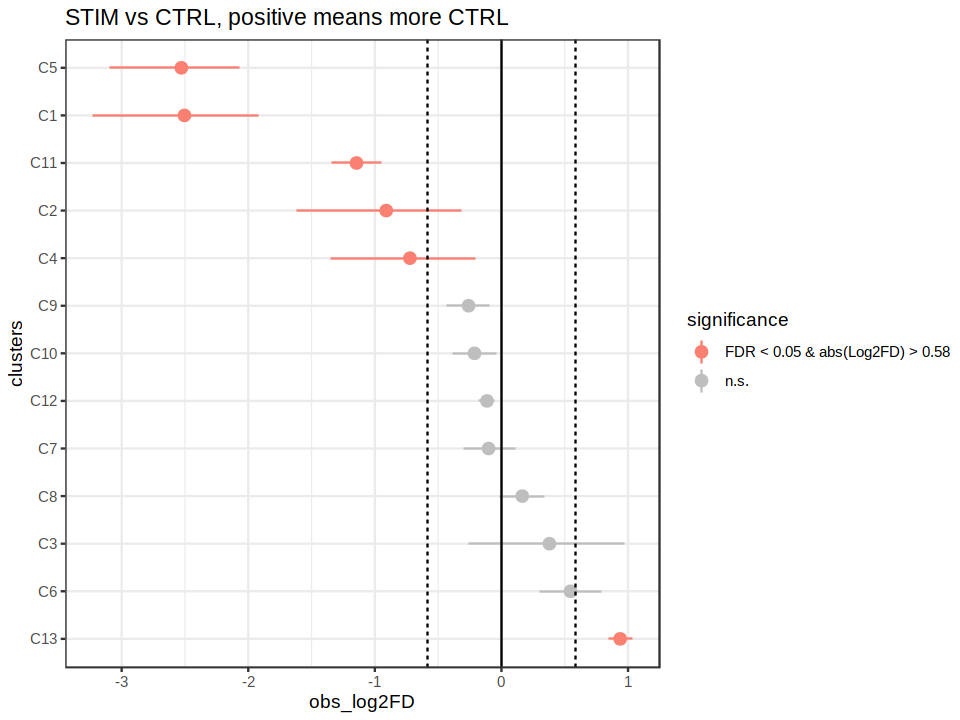

In [45]:
suppressMessages(scProportionPlotS(proj,condition="Sample", clusterName="Clusters", pair=c("STIM", "CTRL")))

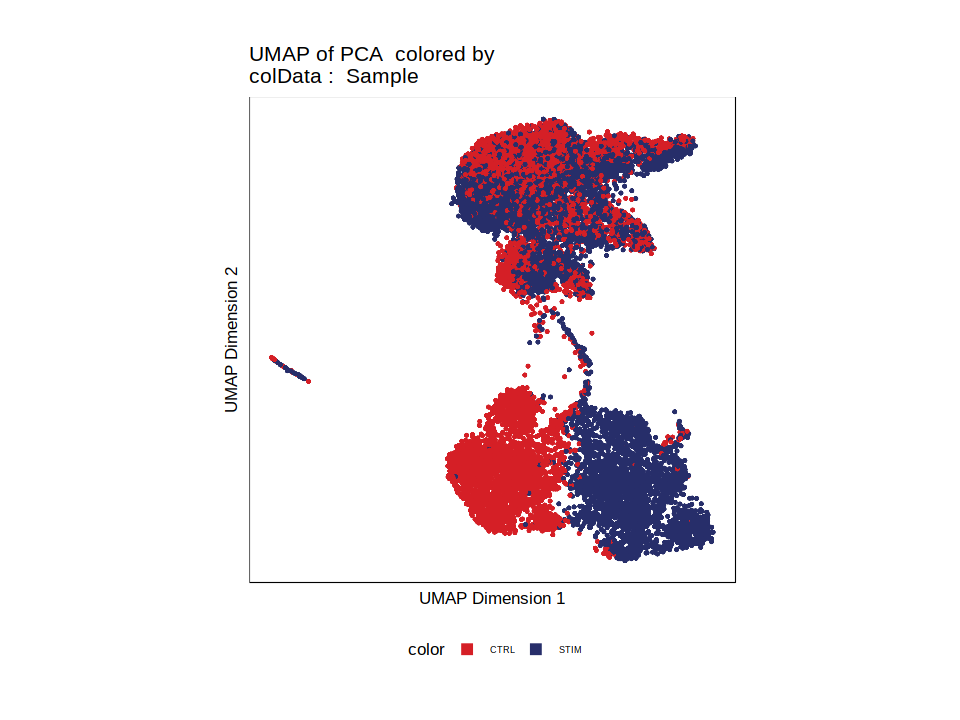

In [46]:
p2 <- suppressMessages(plotEmbedding(proj, name = "Sample", embedding = "UMAP", size = 1.5, labelAsFactors=F, labelMeans=F))
p2 

Warning message:
“No assay specified, setting assay as RNA by default.”


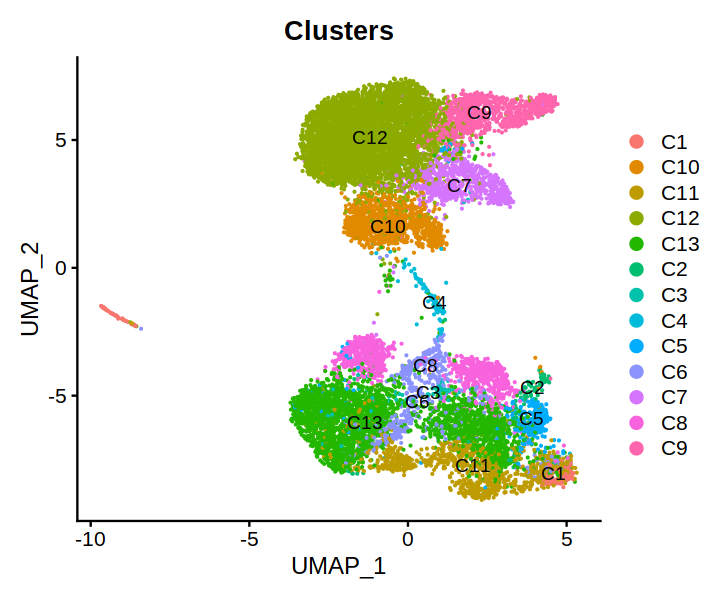

In [47]:
#Seurat style plots
options(repr.plot.width = 6, repr.plot.height = 5)
p3 <- DimPlotS(proj, group.by = "Clusters", reduction= "UMAP", label=T)
p3

Warning message in FeaturePlotS(proj, features = c("GNLY", "PPBP"), reduction = "UMAP", :
“useMatrix is NULL, use first matrix GeneExpressionMatrix!”
Warning message in PartialSeurat(project, useMatrix = useMatrix, assay = assay, :
“assay is NULL, use first assay counts!”
Warning message in PartialSeurat(project, useMatrix = useMatrix, assay = assay, :
“features is NULL, use all features!”
Warning message:
“No assay specified, setting assay as RNA by default.”


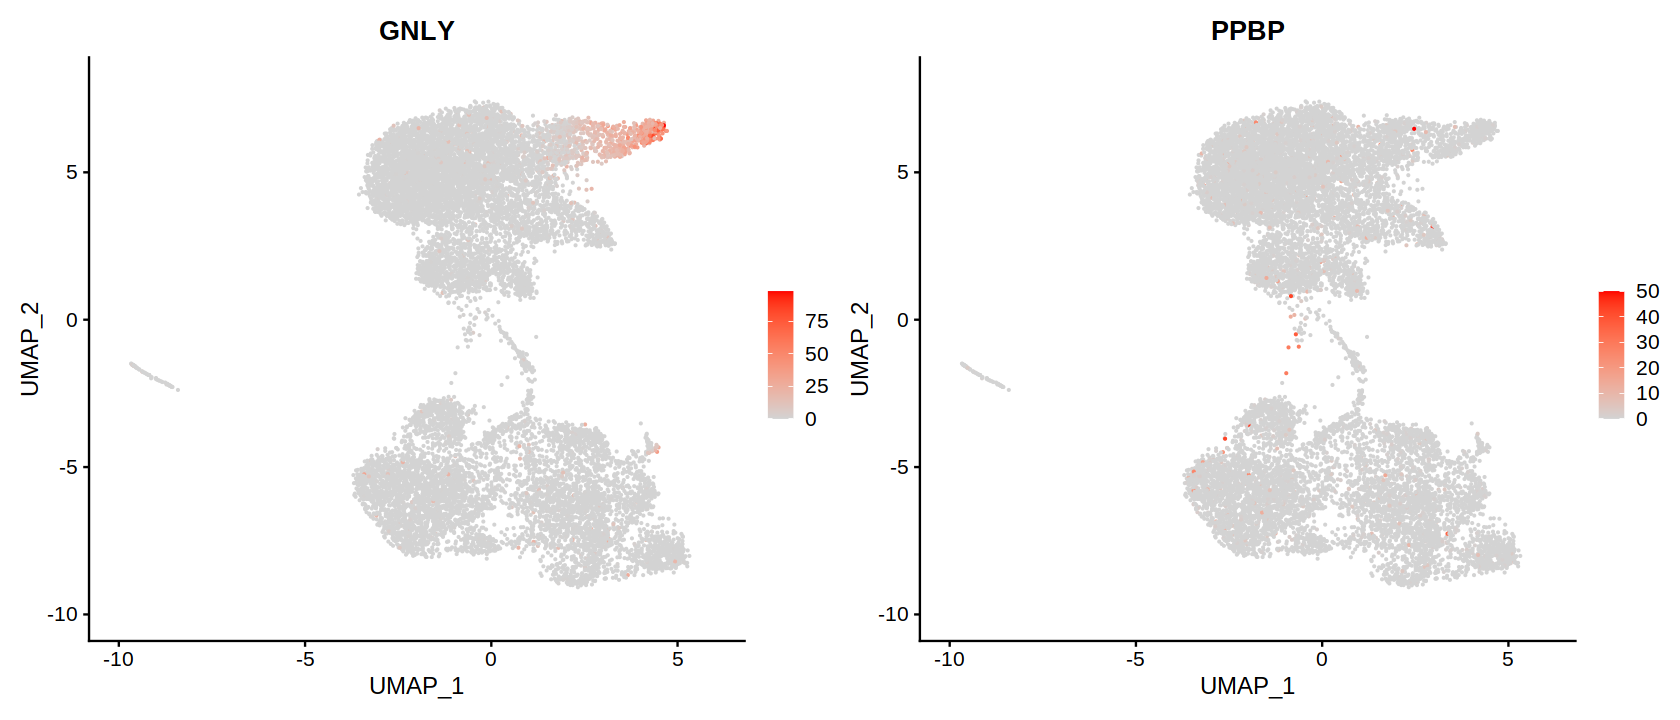

In [48]:
#Seurat style plots
options(repr.plot.width = 14, repr.plot.height = 6)
p4 <- suppressMessages(FeaturePlotS(proj, features=c("GNLY", "PPBP"), reduction= "UMAP", label=F, cols=c("lightgrey", "red")))
p4

Warning message in DoHeatmapS(proj, features = genes, group.by = "Clusters"):
“useMatrix is NULL, use first matrix GeneExpressionMatrix!”
Warning message in PartialSeurat(project, useMatrix = useMatrix):
“features is NULL, use all features!”
Warning message in Seurat::DoHeatmap(object, assay = "RNA", slot = "scale.data", :
“The following features were omitted as they were not found in the scale.data slot for the RNA assay: PRG2, MPO”


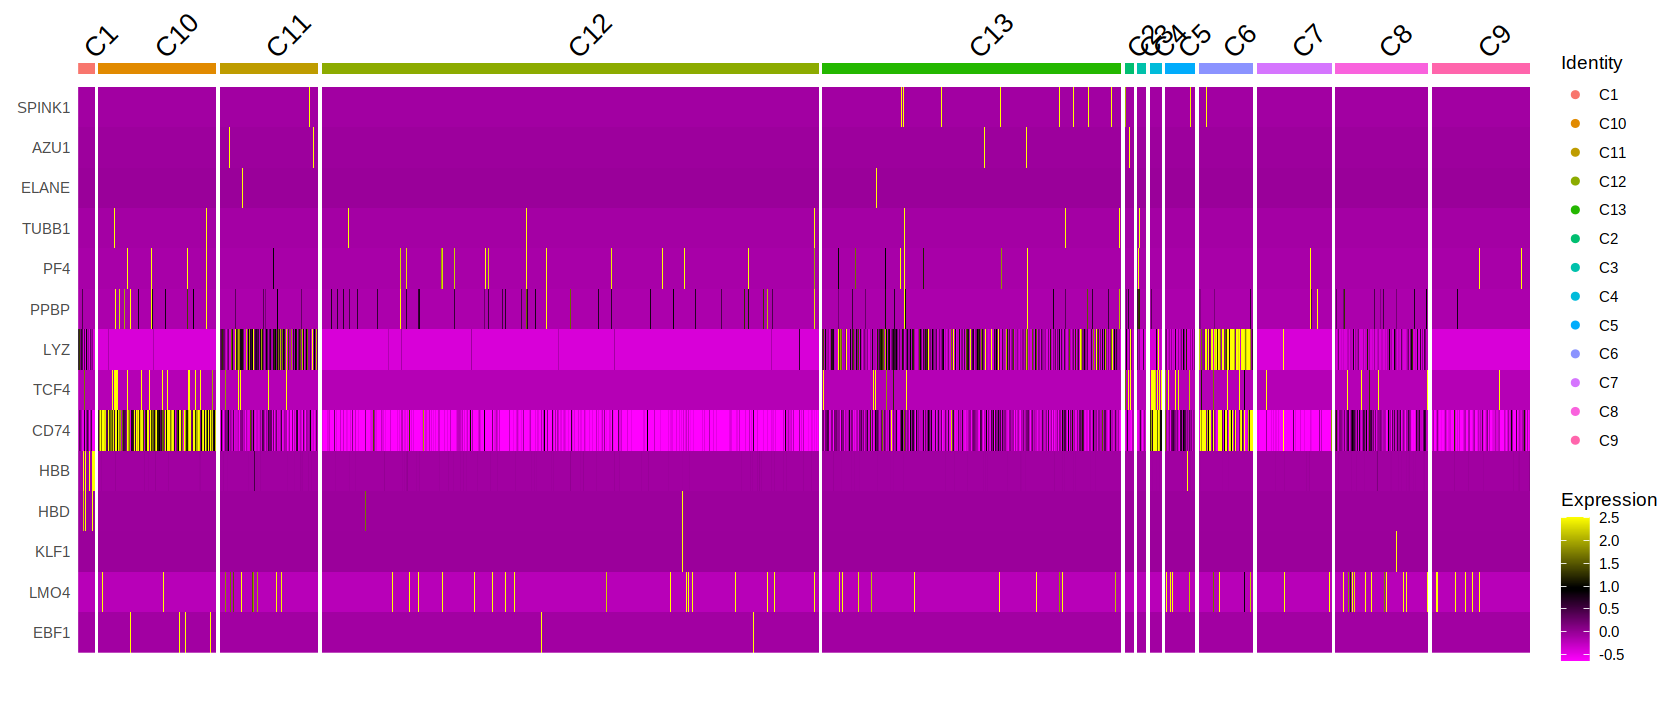

In [49]:
genes <- c("SPINK1", "AZU1", "MPO", "ELANE", "TUBB1", "PF4", "PPBP", "LYZ", "TCF4", "CD74", "HBB", "HBD", "KLF1", "PRG2", "LMO4", "EBF1")  
suppressMessages(DoHeatmapS(proj, features=genes, group.by="Clusters"))

In [50]:
##convert to seurat-object
seu <- suppressMessages(ArchRNA:::PartialSeurat(proj, embeddings = "UMAP", assay = "data"))

Warning message in ArchRNA:::PartialSeurat(proj, embeddings = "UMAP", assay = "data"):
“features is NULL, use all features!”
Warning message:
“No assay specified, setting assay as RNA by default.”


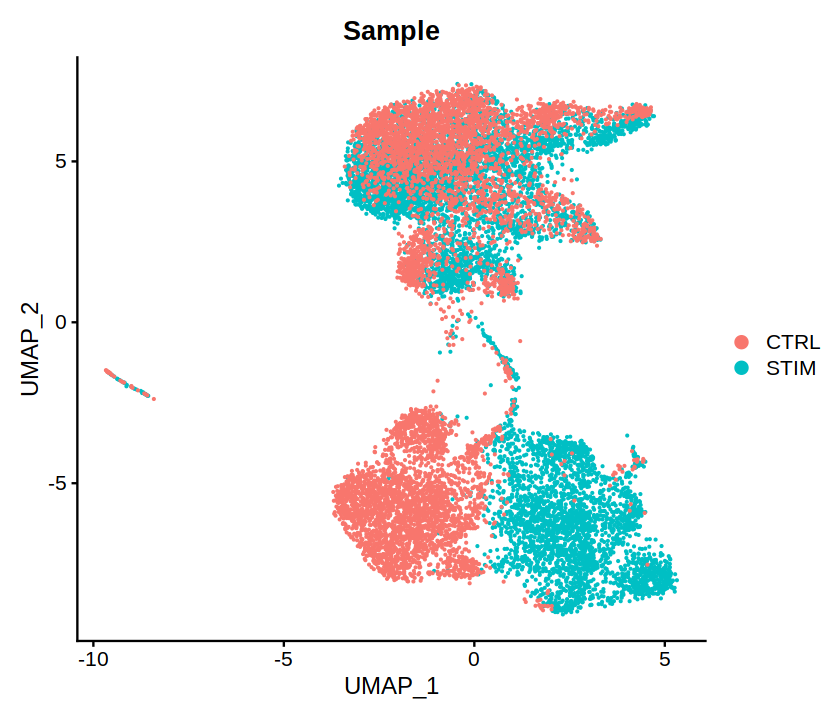

In [51]:
## Convert to Seurat Object
options(repr.plot.width = 7, repr.plot.height = 6)
Seurat::DimPlot(seu, reduction="UMAP", group.by="Sample")

In [52]:
sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 8.7 (Green Obsidian)

Matrix products: default
BLAS/LAPACK: /data/sz753404/miniconda3/envs/schema/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.utf-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.utf-8        LC_COLLATE=en_US.utf-8    
 [5] LC_MONETARY=de_DE.UTF-8    LC_MESSAGES=en_US.utf-8   
 [7] LC_PAPER=de_DE.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=de_DE.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      parallel  stats4    stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] clustree_0.4.4                    ggraph_2.0.5                     
 [3] harmony_0.1.0                     Rcpp_1.0.9                       
 [5] destiny_3.9.0                     gridExtra_2.3                    
 [7] nabor_0.5.0                 